# Notebook to plot the results of the SD algorithms

## Algorithm 1

In [2]:
#select the policy that it is apply
mode = 'free'
dimension = '2'

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
mode = 'free'
# Open the pickle files
with open('Prediction_test_PRIM_PT_2_dim_UNC_new' + mode + '.pickle', 'rb') as handle:
    predictions = pickle.load(handle)

with open('X_final_PRIM_PT_2_dim_UNC_new' + mode + '.pickle', 'rb') as handle:
    X_new_labeled = pickle.load(handle)

with open('Y_final_PRIM_PT_2_dim_UNC_new'+ mode + '.pickle', 'rb') as handle:
    y_new_labeled = pickle.load(handle)

with open('Data/Xtest40_4.pickle', 'rb') as file:
    X_test = pickle.load(file)

with open('Y_final_total_women_trips_dim_2'+ mode + '.pickle', 'rb') as handle:
    y_new_labeled_3 = pickle.load(handle)


In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

mode = 'normal'
# Open the pickle files
with open('Prediction_test_PRIM_PT_2_dim_UNC_new' + mode + '.pickle', 'rb') as handle:
    predictions_normal = pickle.load(handle)

with open('X_final_PRIM_PT_2_dim_UNC_new' + mode + '.pickle', 'rb') as handle:
    X_new_labeled_normal = pickle.load(handle)

with open('Y_final_PRIM_PT_2_dim_UNC_new'+ mode + '.pickle', 'rb') as handle:
    y_new_labeled_normal = pickle.load(handle)

with open('Y_final_total_women_trips_dim_2'+ mode + '.pickle', 'rb') as handle:
    y_new_labeled_3_normal = pickle.load(handle)

In [5]:
y_new_labeled_free = y_new_labeled

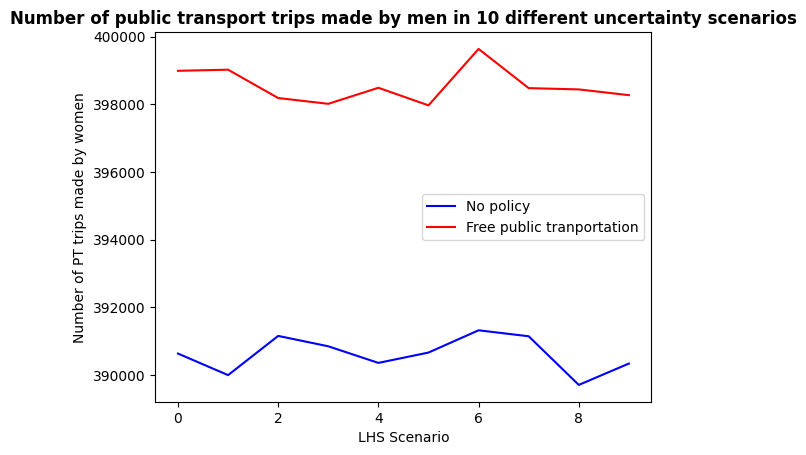

In [6]:
plt.plot(y_new_labeled_normal[:10], label = 'No policy', color = 'blue')
plt.plot(y_new_labeled_free[:10], label = 'Free public tranportation', color = 'red')
plt.title('Number of public transport trips made by men in 10 different uncertainty scenarios', fontweight='bold')
plt.xlabel('LHS Scenario')
plt.ylabel('Number of PT trips made by women')
plt.legend()
plt.show()

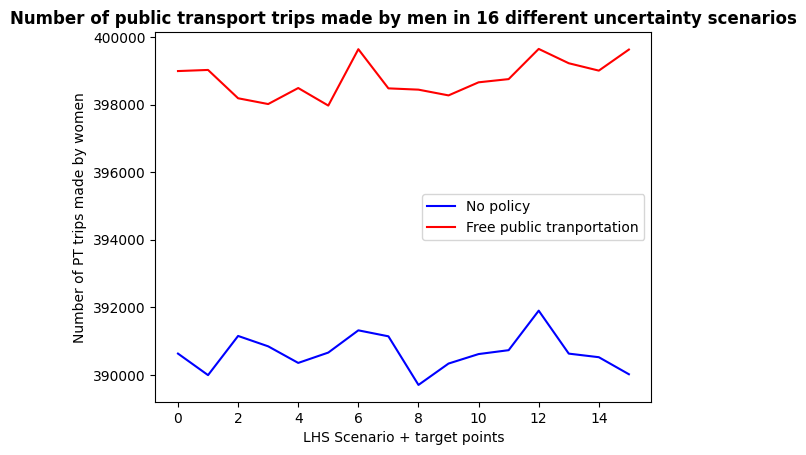

In [7]:
plt.plot(y_new_labeled_normal, label = 'No policy', color = 'blue')
plt.plot(y_new_labeled_free, label = 'Free public tranportation', color = 'red')
plt.title('Number of public transport trips made by men in 16 different uncertainty scenarios', fontweight='bold')
plt.xlabel('LHS Scenario + target points')
plt.ylabel('Number of PT trips made by women')
plt.legend()
plt.show()

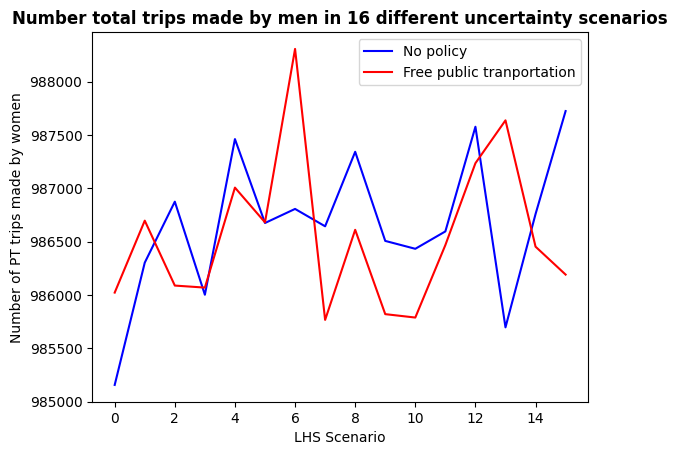

In [8]:
plt.plot(y_new_labeled_3_normal, label = 'No policy', color = 'blue')
plt.plot(y_new_labeled_3, label = 'Free public tranportation', color = 'red')
plt.title('Number total trips made by men in 16 different uncertainty scenarios', fontweight='bold')
plt.xlabel('LHS Scenario')
plt.ylabel('Number of PT trips made by women')
plt.legend()
plt.show()

In [20]:
print('Increase in the percentage of trips after and before the policy',sum((y_new_labeled_free - y_new_labeled_normal)/y_new_labeled_normal *100)/16)

Increase in the percentage of trips after and before the policy 2.077285838320127


In [21]:
first_column_percentile = np.percentile(predictions, 20)
first_column_percentile_normal = np.percentile(predictions_normal, 20)
print('first_column_percentile',first_column_percentile)
print('first_column_percentile_normal',first_column_percentile_normal)

first_column_percentile 398498.95
first_column_percentile_normal 390524.756


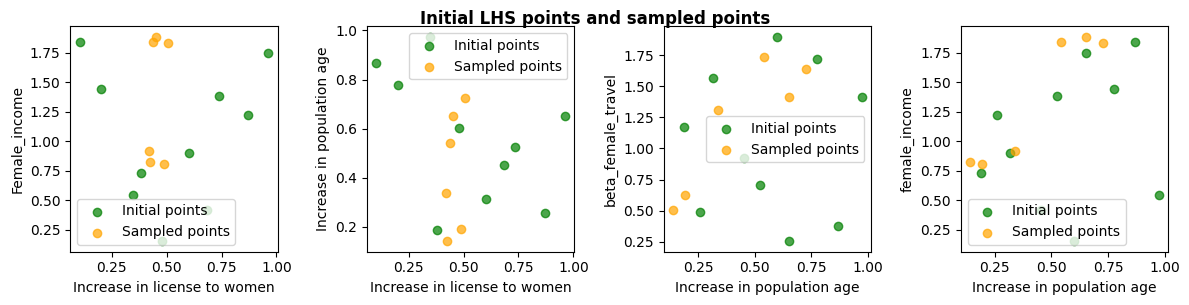

In [22]:
#Plots
X = X_new_labeled
Initial = 10

#Plot with the initial points and the sampled points
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].scatter(X[:Initial,0], X[:Initial,3],  c='green', label = 'Initial points', alpha =0.7)
axes[0].scatter(X[Initial:,0], X[Initial:,3], c='orange', label = 'Sampled points', alpha =0.7)
axes[0].set_xlabel('Increase in license to women')
axes[0].set_ylabel('Female_income')
axes[0].legend()
axes[1].scatter(X[:Initial,0], X[:Initial,1], c='green', label = 'Initial points', alpha =0.7)
axes[1].scatter(X[Initial:,0], X[Initial:,1], c='orange', label = 'Sampled points', alpha =0.7)
axes[1].set_xlabel('Increase in license to women')
axes[1].set_ylabel('Increase in population age')
axes[1].legend()
axes[2].scatter(X[:Initial,1], X[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[2].scatter(X[Initial:,1], X[Initial:,2], c='orange', label = 'Sampled points', alpha =0.7)
axes[2].set_xlabel('Increase in population age')
axes[2].set_ylabel('beta_female_travel')
axes[2].legend()
axes[3].scatter(X[:Initial,1], X[:Initial,3], c='green', label = 'Initial points', alpha =0.7)
axes[3].scatter(X[Initial:,1], X[Initial:,3], c='orange', label = 'Sampled points', alpha =0.7)
axes[3].set_xlabel('Increase in population age')
axes[3].set_ylabel('female_income')
axes[3].legend()
plt.tight_layout()
fig.suptitle('Initial LHS points and sampled points', fontsize=12, fontweight='bold', y=1)
plt.savefig('Visualizations/Picked_points_dim_' + dimension + '_'  + mode +'.png')
plt.show()

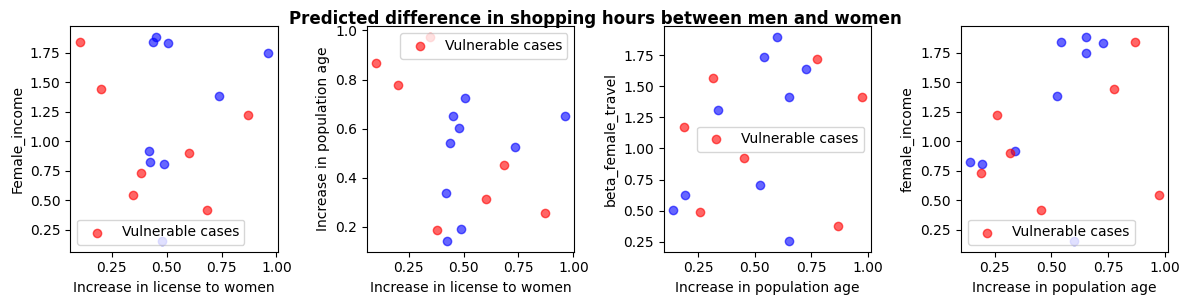

In [23]:
#Plot for the first dimension of vulnerable cases sampled
Y_mask= y_new_labeled < first_column_percentile

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].scatter(X[~Y_mask,0], X[~Y_mask,3], c='blue', alpha =0.6)
axes[0].scatter(X[Y_mask,0], X[Y_mask,3], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[0].set_xlabel('Increase in license to women')
axes[0].set_ylabel('Female_income')
axes[0].legend()
axes[1].scatter(X[~Y_mask,0], X[~Y_mask,1], c='blue', alpha =0.6)
axes[1].scatter(X[Y_mask,0], X[Y_mask,1], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[1].set_xlabel('Increase in license to women')
axes[1].set_ylabel('Increase in population age')
axes[1].legend()
axes[2].scatter(X[~Y_mask,1], X[~Y_mask,2], c='blue', alpha =0.6)
axes[2].scatter(X[Y_mask,1], X[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[2].set_xlabel('Increase in population age')
axes[2].set_ylabel('beta_female_travel')
axes[2].legend()
axes[3].scatter(X[~Y_mask,1], X[~Y_mask,3], c='blue', alpha =0.6)
axes[3].scatter(X[Y_mask,1], X[Y_mask,3], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[3].set_xlabel('Increase in population age')
axes[3].set_ylabel('female_income')
axes[3].legend()
plt.tight_layout()
fig.suptitle('Predicted difference in shopping hours between men and women', fontsize=12, fontweight='bold', y=1)
plt.savefig('Visualizations/Y_1_dim_' + dimension + '_'  + mode +'.png')
plt.show()


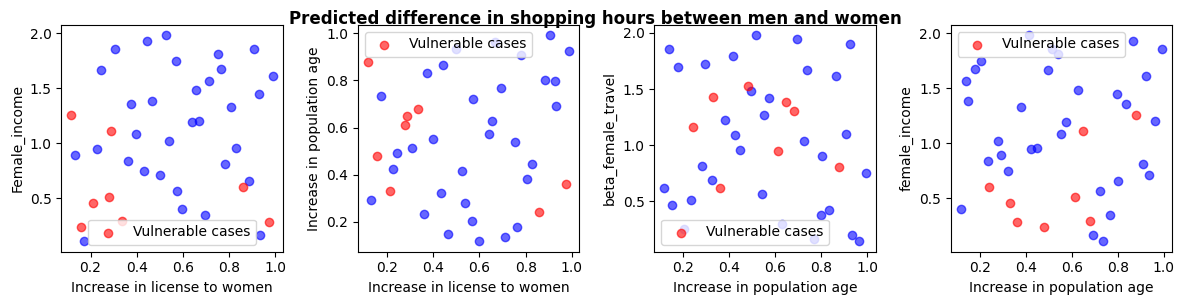

In [24]:
#Plot for the first dimension of vulnerable cases sampled
Y_mask= predictions < first_column_percentile

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].scatter(X_test[~Y_mask,0], X_test[~Y_mask,3], c='blue', alpha =0.6)
axes[0].scatter(X_test[Y_mask,0], X_test[Y_mask,3], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[0].set_xlabel('Increase in license to women')
axes[0].set_ylabel('Female_income')
axes[0].legend()
axes[1].scatter(X_test[~Y_mask,0], X_test[~Y_mask,1], c='blue', alpha =0.6)
axes[1].scatter(X_test[Y_mask,0], X_test[Y_mask,1], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[1].set_xlabel('Increase in license to women')
axes[1].set_ylabel('Increase in population age')
axes[1].legend()
axes[2].scatter(X_test[~Y_mask,1], X_test[~Y_mask,2], c='blue', alpha =0.6)
axes[2].scatter(X_test[Y_mask,1], X_test[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[2].set_xlabel('Increase in population age')
axes[2].set_ylabel('beta_female_travel')
axes[2].legend()
axes[3].scatter(X_test[~Y_mask,1], X_test[~Y_mask,3], c='blue', alpha =0.6)
axes[3].scatter(X_test[Y_mask,1], X_test[Y_mask,3], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[3].set_xlabel('Increase in population age')
axes[3].set_ylabel('female_income')
axes[3].legend()
plt.tight_layout()
fig.suptitle('Predicted difference in shopping hours between men and women', fontsize=12, fontweight='bold', y=1)
plt.savefig('Visualizations/Y_1_dim_' + dimension + '_'  + mode +'.png')
plt.show()


Number of vulnerable scenarios:  8 out of 40


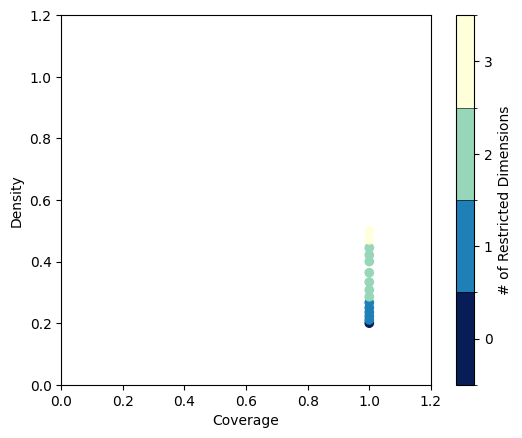

In [25]:
import prim
import pandas as pd
import matplotlib.pyplot as plt

#Created this at the begginning
first_column_percentile = np.percentile(predictions, 20)

y_test = [1 if (predictions[i] < first_column_percentile) else 0 for i in range(len(predictions))]
print("Number of vulnerable scenarios: ", sum(y_test), 'out of', len(y_test))

p = prim.Prim(X_test, y_test, threshold=0.3)

box = p.find_box()
box.show_tradeoff()
plt.show()

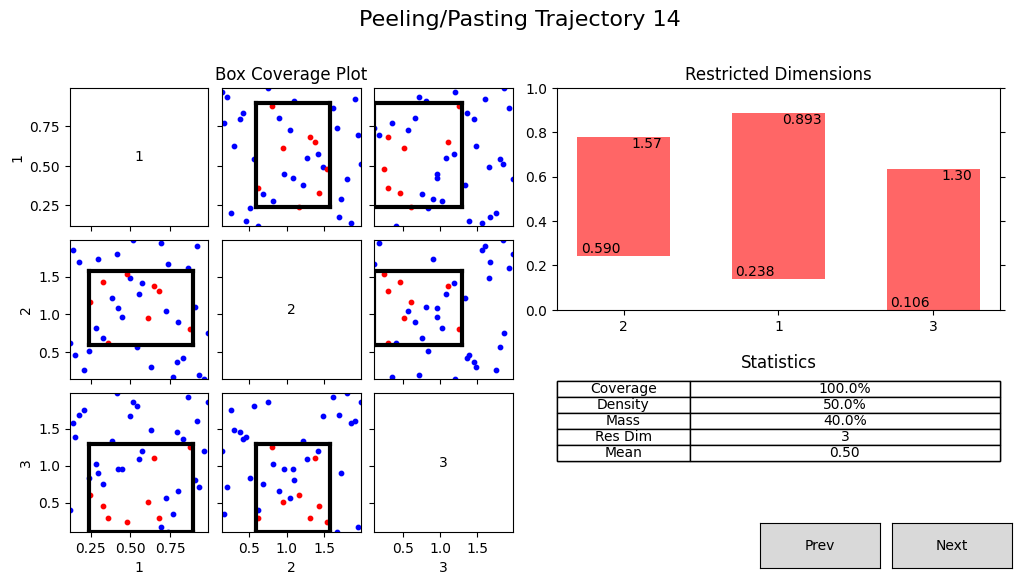

In [26]:
box.show_details()
plt.savefig('Visualizations/PRIM_dim_' + dimension + '_'  + mode +'.png')

In [27]:
p = prim.Prim(X_test, y_test, threshold=0.3)
box = p.find_box()
box_paste = p._paste(box)

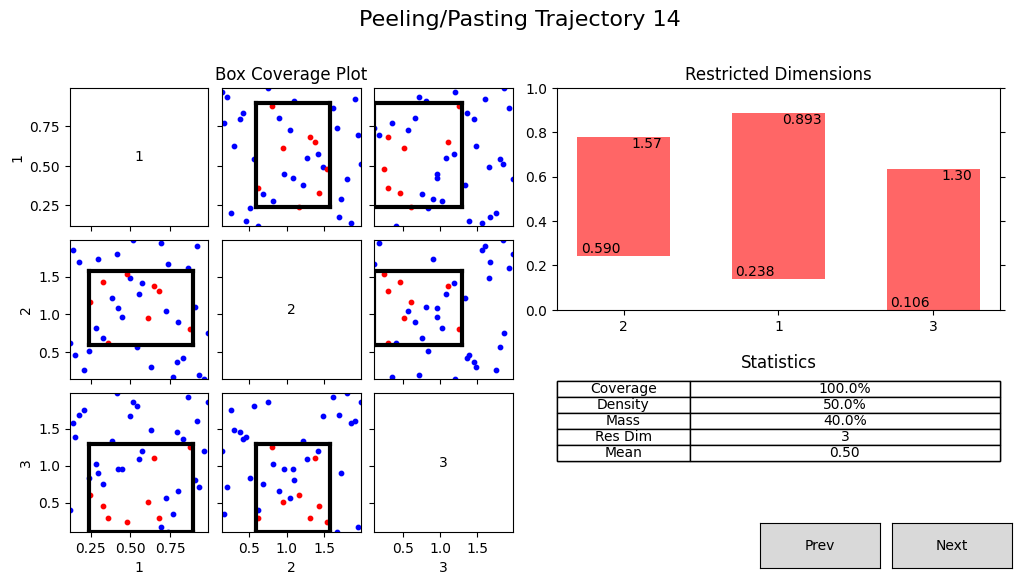

In [29]:
box_paste.show_details()
plt.show()